In [4]:
from Bio import Entrez
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import re

Entrez.email = 'sasha.grrshnova98@gmail.com'

In [5]:
#get sequence by id from ncbi genbank

def id_search(seq_id):
    handle=Entrez.efetch(db="nucleotide", id = seq_id, rettype='fasta')
    for seq_record in SeqIO.parse(handle,'fasta'):
        return seq_record.seq

In [62]:
#поиск по всему геному

for record in SeqIO.parse("GCF_000008685.2_ASM868v2_genomic.fna", "fasta"):
    print(record.seq)

TAAATATAATTTAATAGTATAAAAAAAATTAAATCAAATTAATAATAGTTTAAAAAACTGTTTGTATAATATAATATTATTATATATAATATTAAGCAACTACTATGATACTAATGAAGTATAGTGCTATTTTATTAATATGTAGCGTTAATTTATTTTGTTTTCAAAATAAATTAACTACTTCTCGATGGGAATTCCCTAAAGAAGATTTAATTAAAAAAAAAATAAAAATAGGCATAATTTACCATAATTACATAAATTCTATCTTTTACAATGAAAATTATAAATACATTGCCTTTATCGGAATATTGACATCTTATAATGAATGGATTGAAATACAATTTAGCCCCATAAATTTTTTTACTATCCCAACAAATAAAGATTTTATTTCAAATACTTATTTCAATTTAGCTTTCACTATTTACATTACCAAGTATTCAATTTTAACTGATACACTTGCTATAAAATTTTTTATTGGAACCCAAATCGATTTAACTCTGAGAACTACTATATTTACAGGAAAAACAACTCATGCATTTCTCTATCCAATTCTTCCCATAATTACCTTCAAATTTGAAATTGATTTCATACCTAATAACTATAGTATTTACTATAAATTATCGACTTCTTTTAAAGAATTTATCCTTTTAGATCTAGGAATTTCTATATTTATATAATCCTTTTTTTATTATAGAACTTTTTTTATGGTATAAATTATTTAACACAAATTGTAAAAAGACCAAAAACAAATTTTCAAAACAATTTCACTAAGGAATGAGTACTATATTGACACCCGAACTCAAAGACTTTTTAATAGCATTTTCAATATTAGAAAAACTTCTTGTAATTGCTCCCATATCATAAGAATCTGTCATCATAATACTAGTAATATTTAAATTTTCCCTTATAATATTAACAATACTTTTAGACATGCTAGTTATATCTTTAGAAATTTTAGGAACATTTACATGACCAATCATAATAAATTTAGCAGCTCTAC

In [6]:
#get B.burgdorferi genome

seq_id = 'NC_001318.1'

Bburgdorferi_genome = id_search(seq_id)

In [7]:
#retrieve PAM positions in genome/gene from seq - Watson strand

def PAM_search(seq):
    
    genome = str(seq)
    
    PAM_positions = {}
    PAM_count = {}

    PAM_pos = []
    for m in re.finditer(r"[ACGT]GG", genome):
        PAM_pos.append(m.start())
        PAM_positions['SpCas9'] = PAM_pos
        PAM_count['SpCas9'] = len(PAM_pos)
    
    PAM_pos = []
    for m in re.finditer(r"[ACGT]G[AG][AG]T", genome):
        PAM_pos.append(m.start())
        PAM_positions['SaCas9_1'] = PAM_pos
        PAM_count['SaCas9_1'] = len(PAM_pos)

    PAM_pos = []
    for m in re.finditer(r"[ACGT]G[AG][AG][ACGT]", genome):
        PAM_pos.append(m.start())
        PAM_positions['SaCas9_2'] = PAM_pos
        PAM_count['SaCas9_2'] = len(PAM_pos)
    
    PAM_pos = []
    for m in re.finditer(r"[ACGT][ACGT][ACGT][ACGT][AG][CT]AC", genome):
        PAM_pos.append(m.start())
        PAM_positions['CjCas9'] = PAM_pos
        PAM_count['CjCas9'] = len(PAM_pos)

    return PAM_positions

In [8]:
Bburgdorferi_PAM = PAM_search(Bburgdorferi_genome)

In [9]:
#number of PAM for different Cas9 proteins in B.burgdorferi genome

Bburgdorferi_PAM_cnt = {}
for k in Bburgdorferi_PAM.keys():
    Bburgdorferi_PAM_cnt[k] = len(Bburgdorferi_PAM.get(k))
    
print(Bburgdorferi_PAM_cnt)

{'SpCas9': 19252, 'SaCas9_1': 11338, 'SaCas9_2': 28741, 'CjCas9': 5752}


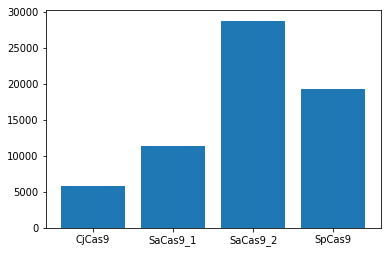

In [10]:
#histogram - number of PAM for different Cas9 proteins in B.burgdorferi genome

import matplotlib.pyplot as plt

plt.bar(list(Bburgdorferi_PAM_cnt.keys()), Bburgdorferi_PAM_cnt.values())
plt.show()

In [11]:
#Watson 5' -> 3' and Crick 3' -> 5' strands

Watson_strand = Bburgdorferi_genome
Crick_strand = Watson_strand.reverse_complement()[::-1]

In [12]:
#retrieve PAM positions in genome/gene from seq - Crick strand

def PAM_rev_search(seq):
    
    C_strand = str(Watson_strand.reverse_complement()[::-1])

    PAM_positions = {}

    PAM_pos = []
    
    for m in re.finditer(r"GG[ACGT]", C_strand):
        PAM_pos.append(m.start())
        PAM_positions['SpCas9'] = PAM_pos
    
    return PAM_positions

In [13]:
#retrieve PAM positions in B.burgdorferi genome - Watson and Crick strand

PAM_rev_pos = PAM_rev_search(Bburgdorferi_genome)
PAM_pos = PAM_search(Bburgdorferi_genome)

In [14]:
PAM_SpCas9_pos = PAM_pos["SpCas9"]
PAM_SpCas9_rev_pos = PAM_rev_pos

In [15]:
#+26 PAM_SpCas9_pos

PAM_SpCas9_pos_y = []

for el in PAM_SpCas9_pos:
    PAM_SpCas9_pos_y.append(el + 26)

In [16]:
#check if val from PAM_SpCas9_pos_y list is in PAM_SpCas9_rev_pos

PAM_pairs = {}

for el in PAM_SpCas9_pos_y:
    if el in set(PAM_SpCas9_rev_pos['SpCas9']):
        PAM_pairs[el-26] = el

In [17]:
#create PAM 26 file -> coordinates of selected PAMs

f = open("PAM_pairs_distance_26.txt", "a")
for k in PAM_pairs.keys():
    a = str(k)+' '+str(PAM_pairs[k])+'\n'
    f.write(a)
f.close()

In [18]:
#PAM_SpCas9_pos is a dict; PAM_SpCas9_rev_pos is a dict

PAM_SpCas9_pos = PAM_pos["SpCas9"]
PAM_SpCas9_rev_pos = PAM_rev_pos["SpCas9"]

In [19]:
#create df_PAM; 1 - Watson, 0 - Crick

import pandas as pd
df_PAM = pd.DataFrame({"PAM_pos" : PAM_SpCas9_pos, "Strand" : 0})

In [20]:
#create df_PAM_rev; 1 - Watson, 0 - Crick

df_PAM_rev = pd.DataFrame({"PAM_pos" : PAM_SpCas9_rev_pos, "Strand" : 1})

In [21]:
df_all_PAMs = pd.concat([df_PAM, df_PAM_rev])

In [1]:
#handle = Entrez.efetch(db="probe", id="Pr032753704", id_type = 'acc', rettype = 'ulist', retmode="text")
#print(handle.read())

NameError: name 'Entrez' is not defined

In [92]:
handle = Entrez.esearch(db="probe", term="borrelia burgdorferi", retmode="text", retmax = 220)

record = Entrez.read(handle)
print(record["IdList"])

['32753704', '32251899', '32251898', '32251897', '32251896', '32251895', '32251894', '32251893', '32251892', '32251891', '32251890', '32251889', '32251888', '15263701', '15263700', '15263699', '15263698', '15263697', '15263696', '15263695', '15263694', '15263693', '15263692', '15263691', '15263690', '15263689', '15263688', '15263687', '15263686', '15263685', '15263684', '15263683', '15263682', '15263681', '15263680', '15263679', '15263678', '15263677', '15263676', '15263675', '15263674', '15263673', '15263672', '15263671', '15263670', '15263669', '15263668', '15263667', '15263666', '15263665', '15263664', '15263663', '15263662', '15263661', '15263660', '15263659', '15263658', '15263657', '15263656', '15263655', '15263654', '15263653', '15263652', '15263651', '15263650', '15263649', '15263648', '15263647', '15263646', '15263645', '15263644', '15263643', '15263642', '15263641', '15263640', '15263639', '15263638', '15263637', '15263636', '15263635', '15263634', '15263633', '15263632', '15

In [99]:
import requests

id_dbprobe = '32753704'
link = 'https://www.ncbi.nlm.nih.gov/probe/' + id_dbprobe
f = requests.get(link)
print(f.text)

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
    <head xmlns:xi="http://www.w3.org/2001/XInclude"><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
    <!-- meta -->
    <meta name="robots" content="index,nofollow,noarchive" />
<meta name="ncbi_app" content="entrez" /><meta name="ncbi_db" content="probe" /><meta name="ncbi_report" content="fullreport" /><meta name="ncbi_format" content="html" /><meta name="ncbi_pagesize" content="20" /><meta name="ncbi_sortorder" content="default" /><meta name="ncbi_pageno" content="1" /><meta name="ncbi_resultcount" content="1" /><meta name="ncbi_op" content="retrieve" /><meta name="ncbi_pdid" content="fullreport" /><meta name="ncbi_sessionid" content="CE880A8CD0A137B1_2047SID" /><meta name="ncbi_uidlist" content="32753704" /><meta name="ncbi_filter" content="all" /><meta na